In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import warnings  
import math

# Ignore all warnings  
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline

📌
Before diving into analysis, it’s essential to understand the structure, shape, and quality of the data.

In [86]:
# Load the dataset 
#df = pd.read_csv('../../../raw/student_depression_dataset.csv')
import os

# Get the project root based on the notebook's location
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))  # go up to project root

# Create a path to your dataset
csv_path = os.path.join(project_root, 'Data', 'raw', 'student_depression_dataset.csv')

# Load it
import pandas as pd
df = pd.read_csv(csv_path)


In [87]:
df.head()# print first 5 rows of the dataset
    

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [88]:
df.shape

(27901, 18)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

💬 Interpretation:¶

The dataset consists of various features such as Age, Gender, Academic Pressure, Study Satisfaction, Financial Stress, etc.

The goal is to prepare and clean these fields for meaningful analysis.

In [90]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [91]:
# Convert object columns to category
for col in df.select_dtypes(include='object').columns:
    if col != 'Financial Stress':  # Exclude Financial Stress from category conversion
        df[col] = df[col].astype('category')

# Convert Financial Stress to float
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')


In [92]:
(df == 0).sum() 

id                                           0
Gender                                       0
Age                                          0
City                                         0
Profession                                   0
Academic Pressure                            9
Work Pressure                            27898
CGPA                                         9
Study Satisfaction                          10
Job Satisfaction                         27893
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                          1700
Financial Stress                             0
Family History of Mental Illness             0
Depression                               11565
dtype: int64

In [93]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

id: [     2      8     26 ... 140689 140690 140699]
Gender: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
City: ['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur', ..., 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad']
Length: 52
Categories (52, object): [''Less Delhi'', ''Less than 5 Kalyan'', '3.0', 'Agra', ..., 'Vadodara', 'Varanasi', 'Vasai-Virar', 'Visakhapatnam']
Profession: ['Student', ''Civil Engineer'', 'Architect', ''UX/UI Designer'', ''Digital Marketer'', ..., 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur', 'Pharmacist']
Length: 14
Categories (14, object): [''Civil Engineer'', ''Content Writer'', ''Digital Marketer'', ''Educational Consultant'', ..., 'Manager', 'Pharmacist', 'Student', 'Teacher']
Academic Pressure: [5. 2. 3. 4. 1. 0.]
Work Pressure: [0. 5. 2.]
CGPA: [ 8.97    5.9     7.03    5.59    8.13  

In [94]:
df['Sleep Duration'] = df['Sleep Duration'].replace('Others', np.nan)
df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)
df['Dietary Habits'] = df['Dietary Habits'].replace('Others', np.nan)

In [95]:
df.isnull().sum()

id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                           12
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          3
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [96]:
# Transforming the Financial Stress column to numeric and replacing null values with the median
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())


# Creating lists with categorical variables and numeric variables according to their DTYPE
categorical_col = df.select_dtypes(include=['object']).columns.to_list()
numerical_col = df.select_dtypes(include=['int64','float64']).columns.to_list()

# Excluding the 'Id' column
numerical_col = [col for col in numerical_col if col not in ['id']]

In [97]:
# Transform the "Yes/No" values in "1/0" values
binary_map = {'Yes' : 1,'No' : 0}
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(binary_map)
df['Family History of Mental Illness']= df['Family History of Mental Illness'].map(binary_map)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27883 non-null  cat

In [99]:
# To see statistics for all columns, including object (categorical) columns, use:
df.describe(include='all')


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27883,27889,27901,27901.0,27901.000000,27901.000000,27901.0,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,4,3,28,2.0,NaN,NaN,2.0,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',1.0,NaN,NaN,0.0,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656.0,NaN,NaN,14398.0,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139852,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437270,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [100]:


def value_counts_pretty(series, column_name="Value"):
    value_counts = series.value_counts(dropna=False)
    percentages = series.value_counts(normalize=True, dropna=False) * 100

    table = PrettyTable()
    table.field_names = [column_name, "Count", "Percentage"]
    table.align[column_name] = "c"
    table.align["Count"] = "r"
    table.align["Percentage"] = "r"

    for value, count in value_counts.items():
        display_value = "NaN/Missing" if pd.isna(value) else str(value)
        pct = percentages[value]
        table.add_row([display_value, count, f"{pct:.2f}%"])
    return table

colsJob = ['Work Pressure', 'Job Satisfaction','Gender' ,'Age' ,'City' ,'Profession' ,'Academic Pressure' ,'Work Pressure' ,
           'CGPA' ,'Job Satisfaction' ,'Sleep Duration' ,'Dietary Habits' ,'Study Satisfaction' ,'Have you ever had suicidal thoughts ?', 
           'Work/Study Hours','Financial Stress','Family History of Mental Illness','Depression'   ]                            

for col in colsJob:
    print(f"\n Value counts for '{col}':")
    print(value_counts_pretty(df[col], col))


 Value counts for 'Work Pressure':
+---------------+-------+------------+
| Work Pressure | Count | Percentage |
+---------------+-------+------------+
|      0.0      | 27898 |     99.99% |
|      5.0      |     2 |      0.01% |
|      2.0      |     1 |      0.00% |
+---------------+-------+------------+

 Value counts for 'Job Satisfaction':
+------------------+-------+------------+
| Job Satisfaction | Count | Percentage |
+------------------+-------+------------+
|       0.0        | 27893 |     99.97% |
|       2.0        |     3 |      0.01% |
|       4.0        |     2 |      0.01% |
|       1.0        |     2 |      0.01% |
|       3.0        |     1 |      0.00% |
+------------------+-------+------------+

 Value counts for 'Gender':
+--------+-------+------------+
| Gender | Count | Percentage |
+--------+-------+------------+
|  Male  | 15547 |     55.72% |
| Female | 12354 |     44.28% |
+--------+-------+------------+

 Value counts for 'Age':
+------+-------+-----------

In [101]:
def value_counts_pretty(series, column_name="Value", threshold_percentage=90):
    value_counts = series.value_counts(dropna=False)
    percentages = series.value_counts(normalize=True, dropna=False) * 100

    # Check if any percentage meets the threshold
    if not (percentages >= threshold_percentage).any():
        return None # Return None if no value meets the threshold

    table = PrettyTable()
    table.field_names = [column_name, "Count", "Percentage"]
    table.align[column_name] = "c"
    table.align["Count"] = "r"
    table.align["Percentage"] = "r"

    for value, count in value_counts.items():
        display_value = "NaN/Missing" if pd.isna(value) else str(value)
        pct = percentages[value]
        table.add_row([display_value, count, f"{pct:.2f}%"])
    return table

colsJob = ['Work Pressure', 'Job Satisfaction','Gender' ,'Age' ,'City' ,'Profession' ,'Academic Pressure' ,
           'CGPA' ,'Sleep Duration' ,'Dietary Habits' ,'Study Satisfaction' ,'Have you ever had suicidal thoughts ?',
           'Work/Study Hours','Financial Stress','Family History of Mental Illness','Depression']

for col in colsJob:
    table_output = value_counts_pretty(df[col], col)
    if table_output: # Only print if the table is not None (i.e., meets the threshold)
        print(f"\n Value counts for '{col}':")
        print(table_output)


 Value counts for 'Work Pressure':
+---------------+-------+------------+
| Work Pressure | Count | Percentage |
+---------------+-------+------------+
|      0.0      | 27898 |     99.99% |
|      5.0      |     2 |      0.01% |
|      2.0      |     1 |      0.00% |
+---------------+-------+------------+

 Value counts for 'Job Satisfaction':
+------------------+-------+------------+
| Job Satisfaction | Count | Percentage |
+------------------+-------+------------+
|       0.0        | 27893 |     99.97% |
|       2.0        |     3 |      0.01% |
|       4.0        |     2 |      0.01% |
|       1.0        |     2 |      0.01% |
|       3.0        |     1 |      0.00% |
+------------------+-------+------------+

 Value counts for 'Profession':
+--------------------------+-------+------------+
|        Profession        | Count | Percentage |
+--------------------------+-------+------------+
|         Student          | 27870 |     99.89% |
|        Architect         |     8 |     

🔍 Key Insights 
1. Work Pressure
Observation: 99.99% report 0.0; very low variance.

Action: Consider dropping or binarizing (0 = no pressure, 1 = pressure).

2. Job Satisfaction
Observation: 99.97% report 0.0; very skewed.

Action: Consider dropping or converting to binary feature.

3. Gender
Observation: 'Male' is the dominant category.

Action: Encode appropriately (e.g., one-hot or label encoding).

4. Target Variable (Depression)
Observation: Imbalanced (Class 1: 58.55%, Class 0: 41.45%).

Action:

Use stratified split during train-test.

Focus on Recall, F1-score, ROC-AUC, not just accuracy.

If needed: resampling, tree-based models, or cost-sensitive learning.

In [102]:
df=df.copy()

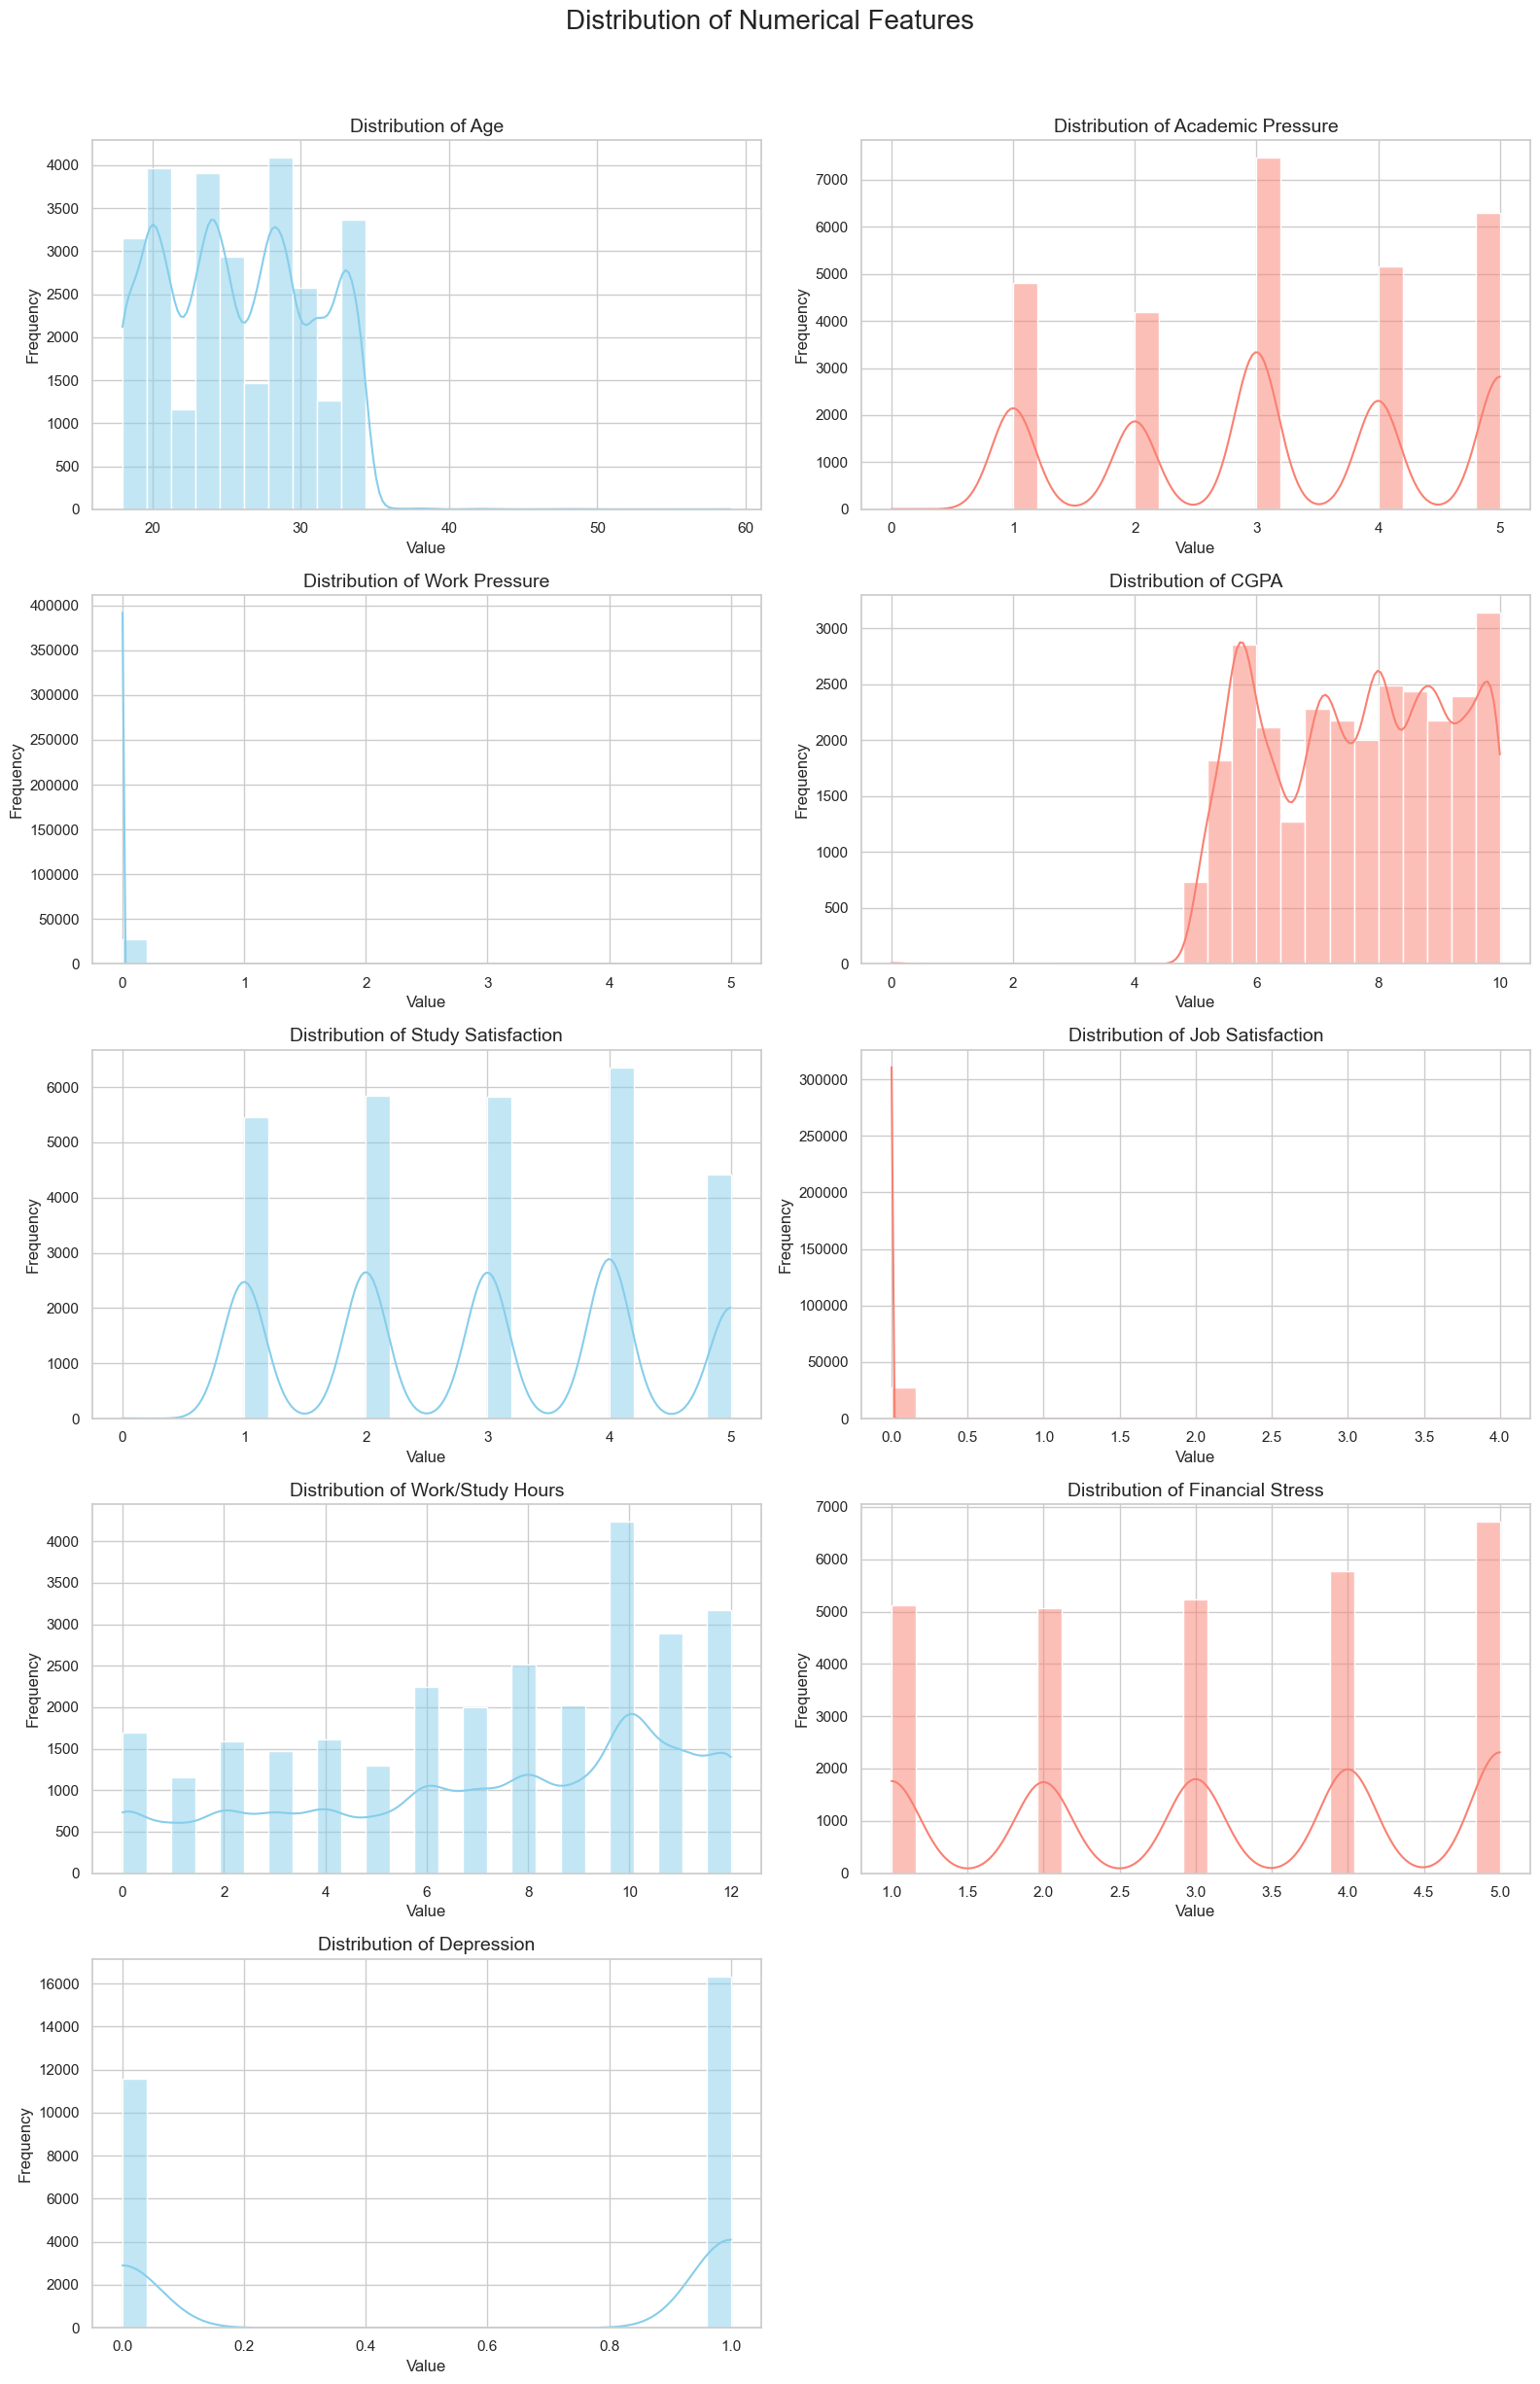

In [126]:

# Drop NaNs from numerical columns
plot_data = df[numerical_col].dropna()

# Set layout: 2 plots per row
ncols = 2
nrows = math.ceil(len(numerical_col) / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5 * nrows))
axes = axes.flatten()

colors = ['skyblue', 'salmon']

# Plot each feature
for i, feature in enumerate(numerical_col):
    color = colors[i % len(colors)]
    sns.histplot(data=plot_data, x=feature, bins=25, kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Title and layout
plt.suptitle("Distribution of Numerical Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


📊 3. Work Pressure
Insight: Extremely right-skewed; almost all values are 0.0, with very few > 0.

Decision:

Very low variance – consider dropping or binarizing (0 = no pressure, 1 = any pressure).

Not likely useful in numeric form.

📊 6. Job Satisfaction
Insight: Almost everyone reports 0.0, indicating extreme class imbalance.

Decision:

Like Work Pressure, very low variance.

Consider dropping or binarizing (0 vs >0).

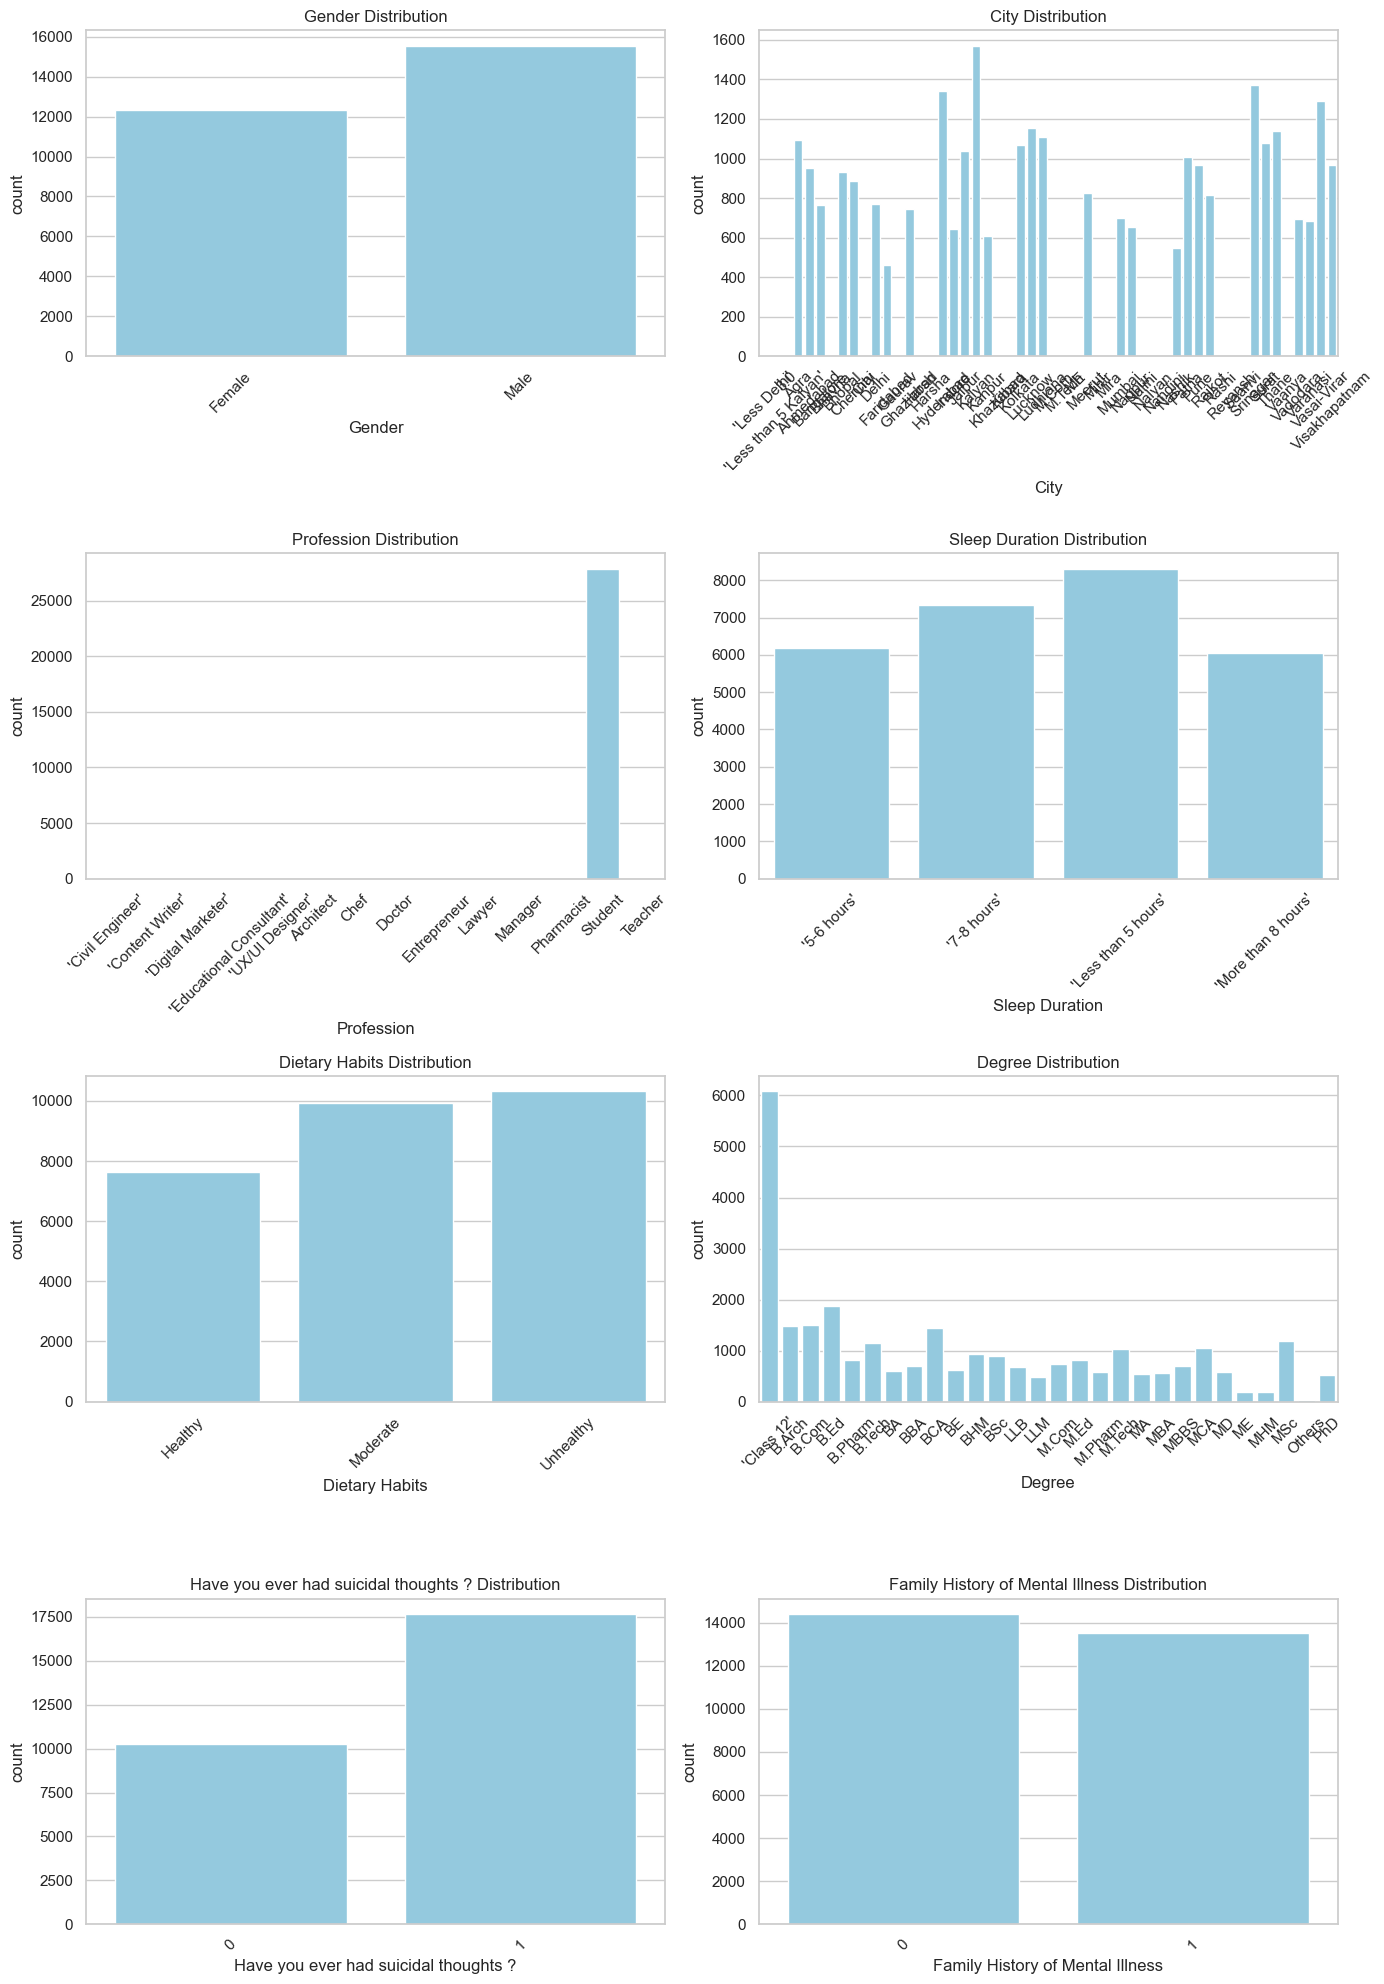

In [124]:
categorical_col = df.select_dtypes(include='category').columns.tolist()

n_cols = 2
n_rows = math.ceil(len(categorical_col) / n_cols)

plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(categorical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


📌 3. Profession
Insight: 'Student' overwhelmingly dominates.

Decision:

Strong class imbalance → reduce to “Student” vs “Other”.

Or group rare professions into "Other" category.

📌 5. Dietary Habits
Insight: Majority are moderate or unhealthy.

Decision:

Keep as ordinal/categorical.

Might correlate with depression or stress levels.

📌 6. Degree
Insight: Very high cardinality; lots of unique degree types with small counts.

Decision:

Reduce to broader categories (e.g., “Undergraduate”, “Postgraduate”).

Or encode using frequency/target encoding.

📌 7. Suicidal Thoughts
Insight: About 65% said 'Yes' to having had suicidal thoughts.

Decision:

Strong mental health indicator → important feature.

Consider using as-is (already binary/categorical).

📌 8. Family History of Mental Illness
Insight: Roughly balanced between Yes (1) and No (0).

Decision:

Useful feature; keep as binary (0/1).

May have predictive value for depression.

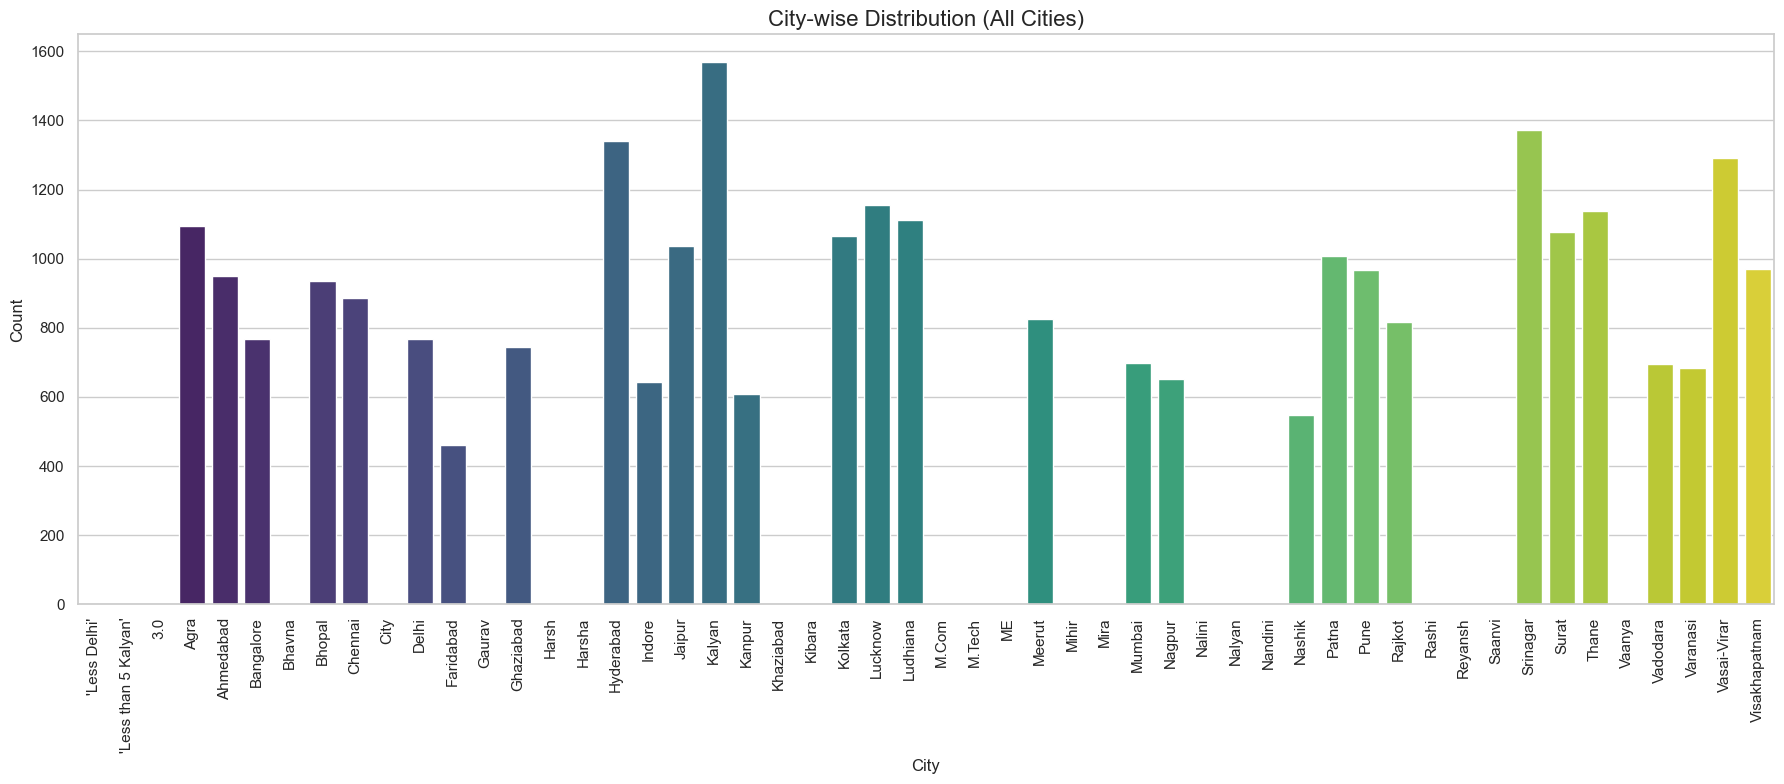

In [127]:
# Get value counts for all cities
city_counts = df['City'].value_counts()

# Plot
plt.figure(figsize=(18, 8))  # Adjust width to fit all city labels
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')

plt.title("City-wise Distribution (All Cities)", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)  # Rotate for readability
plt.tight_layout()
plt.show()

City Distribution Insights

High Cardinality: The dataset contains many unique city names, which can cause sparse data issues and potential overfitting in models if used directly.

Top Cities: Indore, Surat, Hyderabad, and Pune have the highest respondent counts, each exceeding 1000 entries.

Data Quality Issues: Several city entries appear to be errors or mislabels (e.g., 'Less Delhi', '3.0', 'City', 'M.Com'), indicating data cleaning is needed

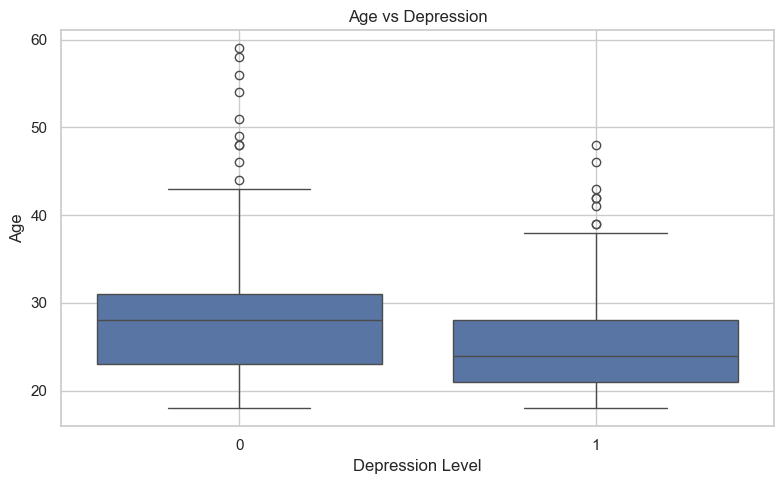

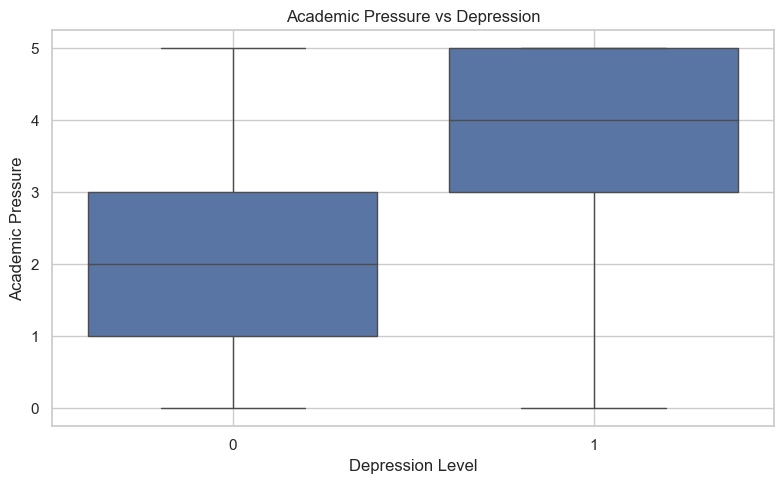

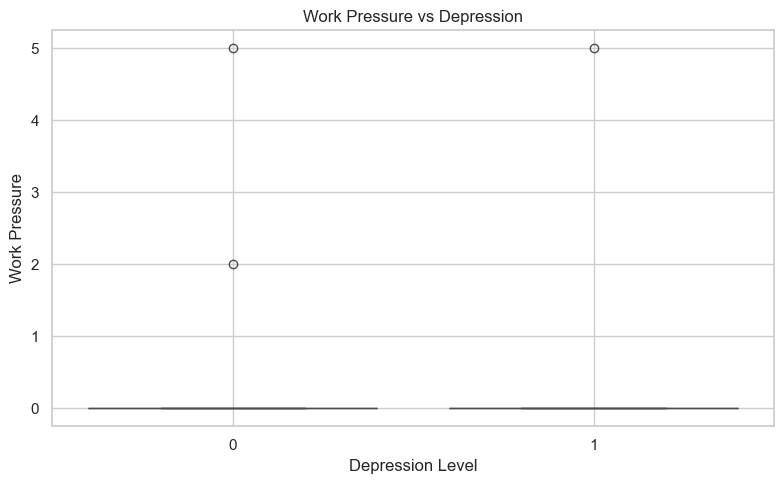

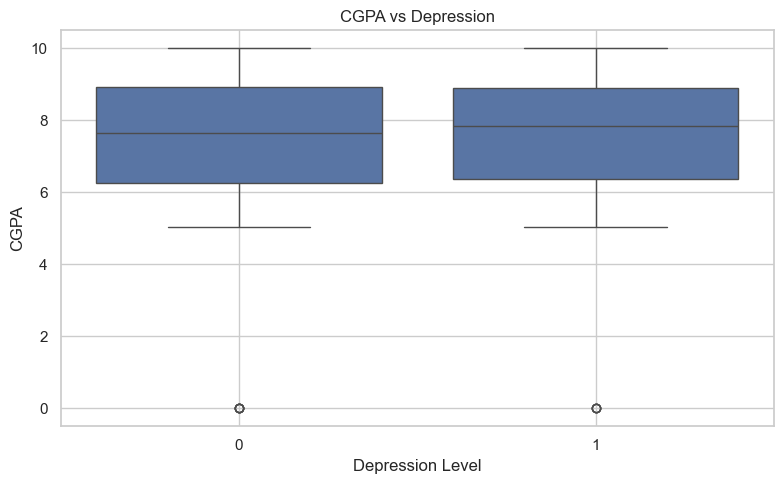

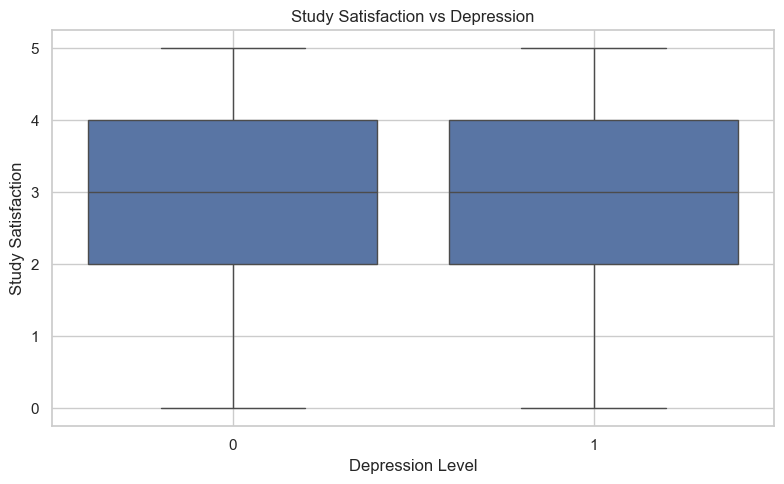

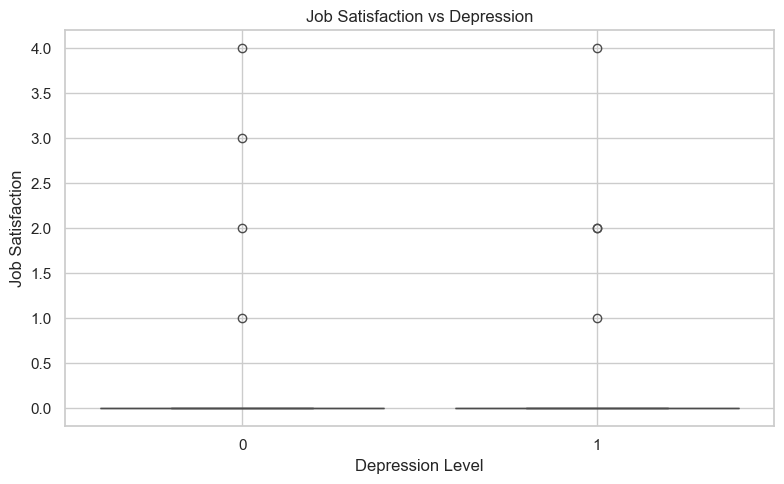

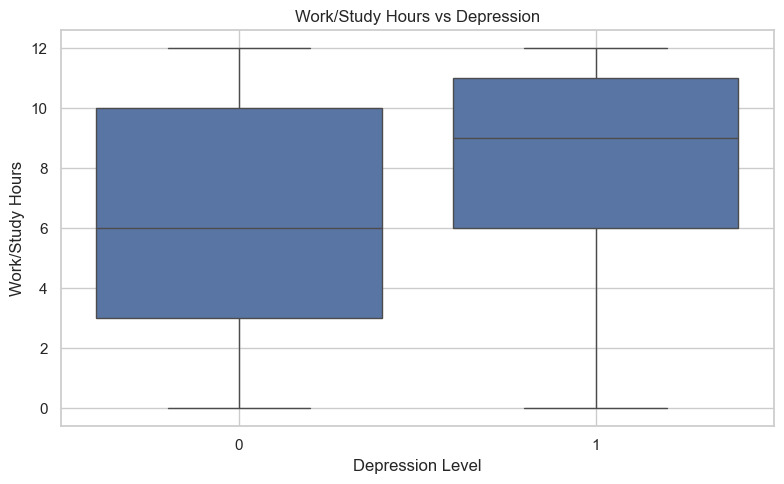

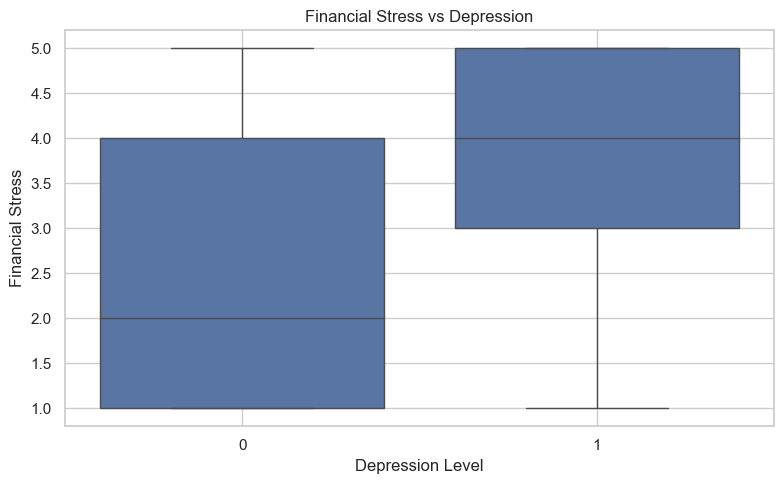

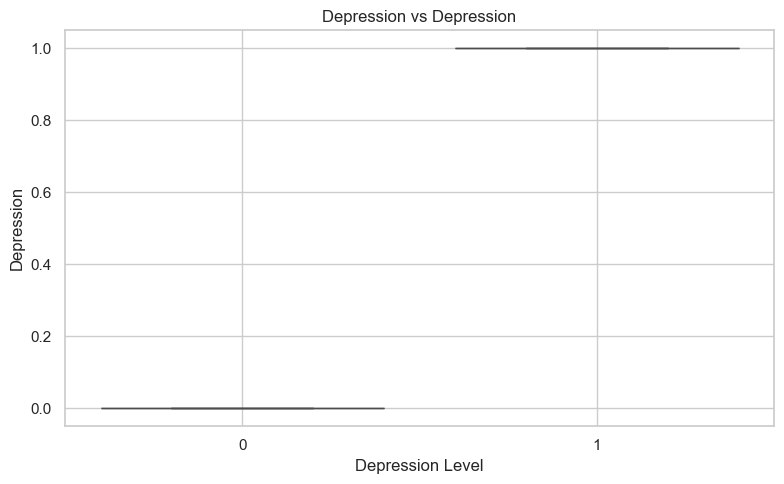

In [104]:


for feature in numerical_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Depression', y=feature, data=df)
    plt.title(f'{feature} vs Depression')
    plt.xlabel('Depression Level')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


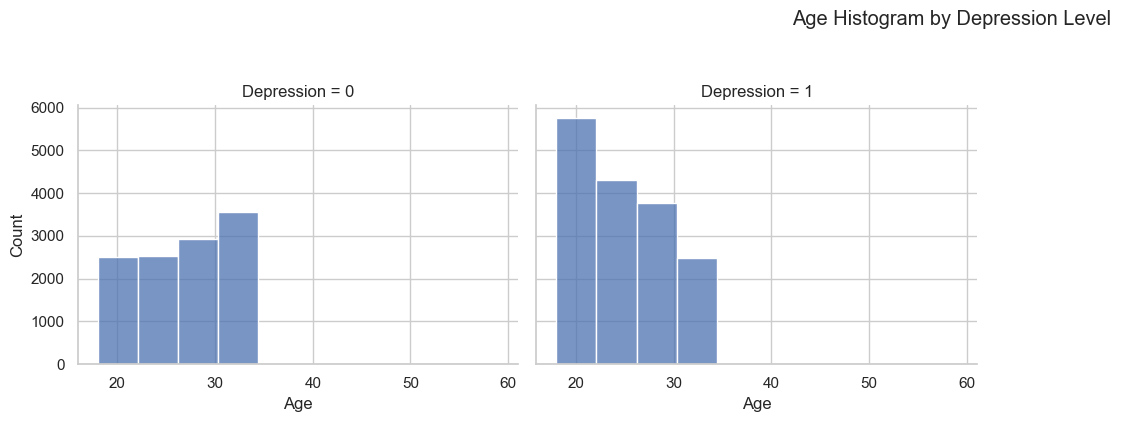

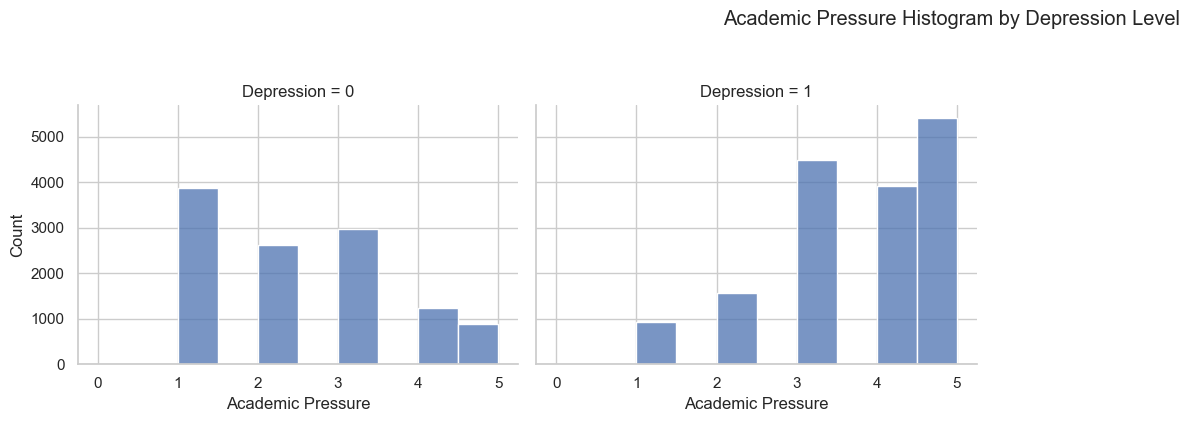

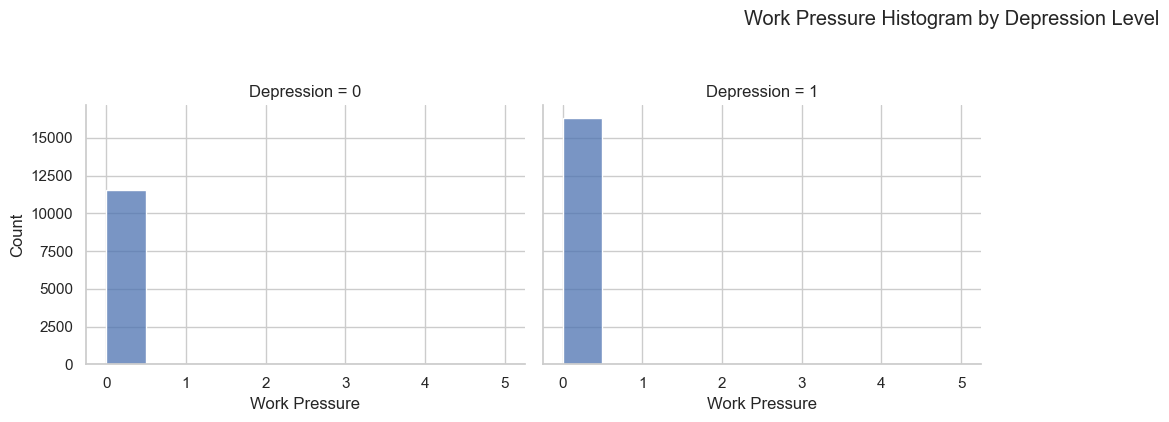

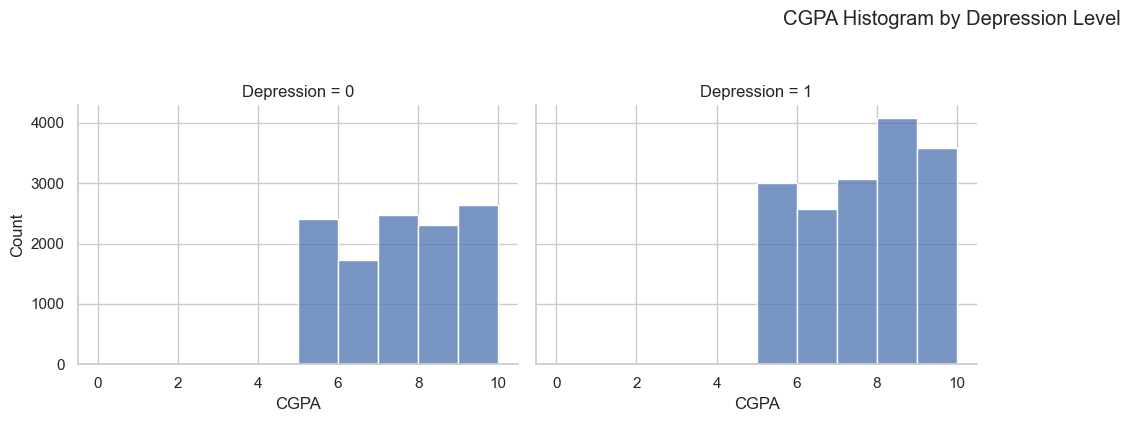

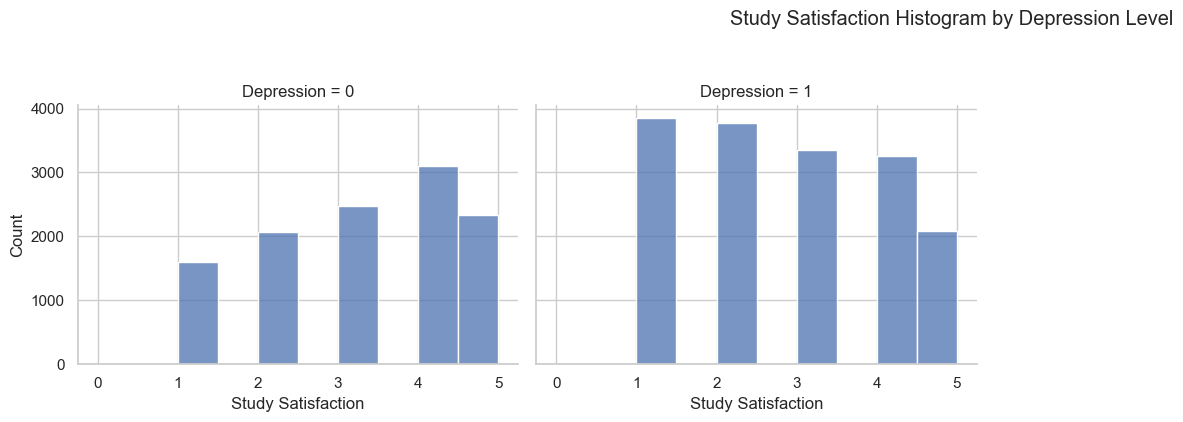

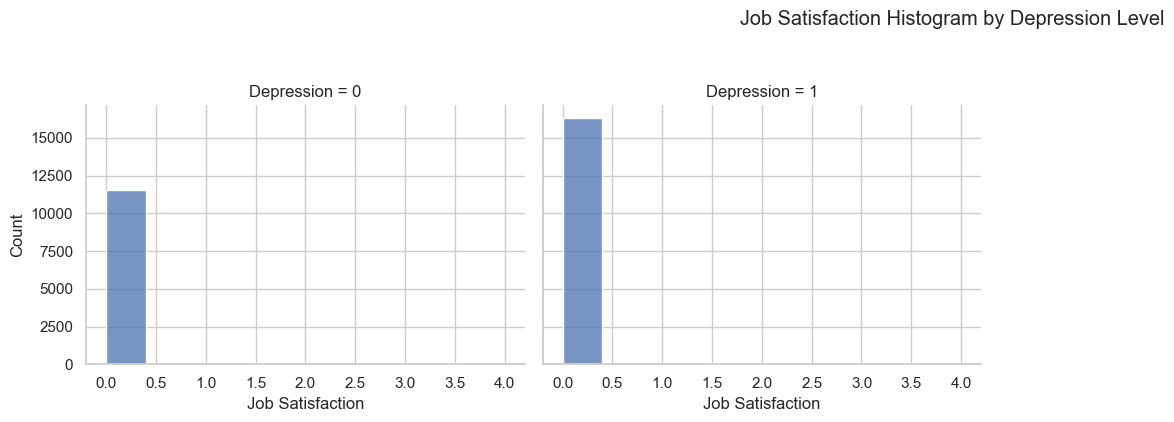

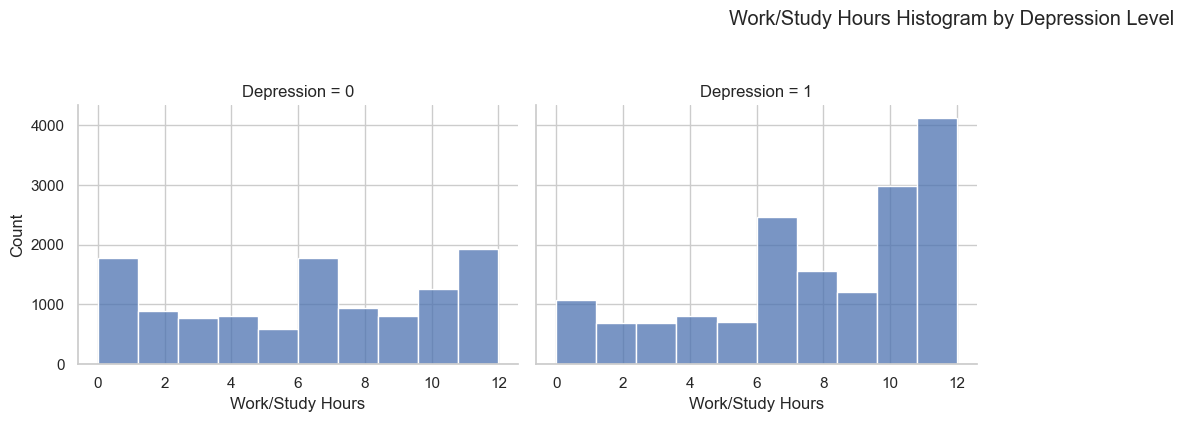

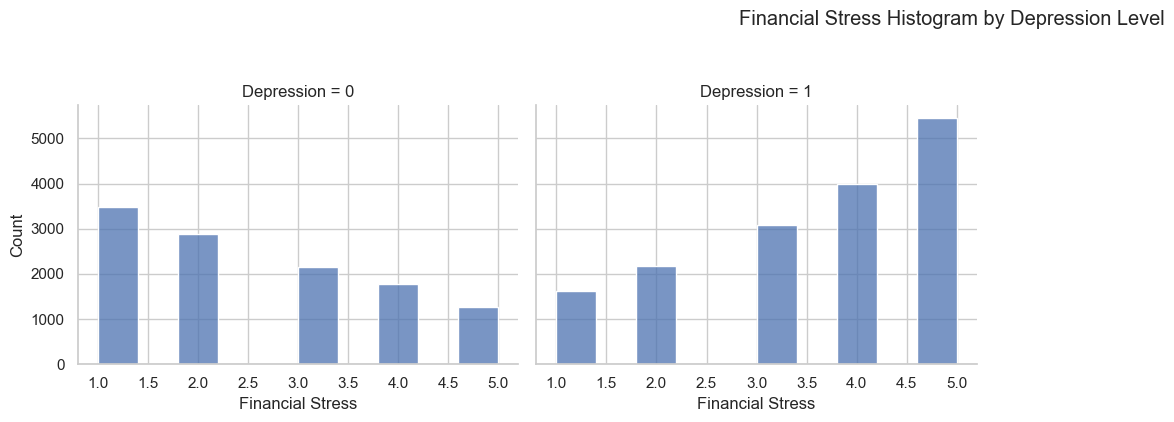

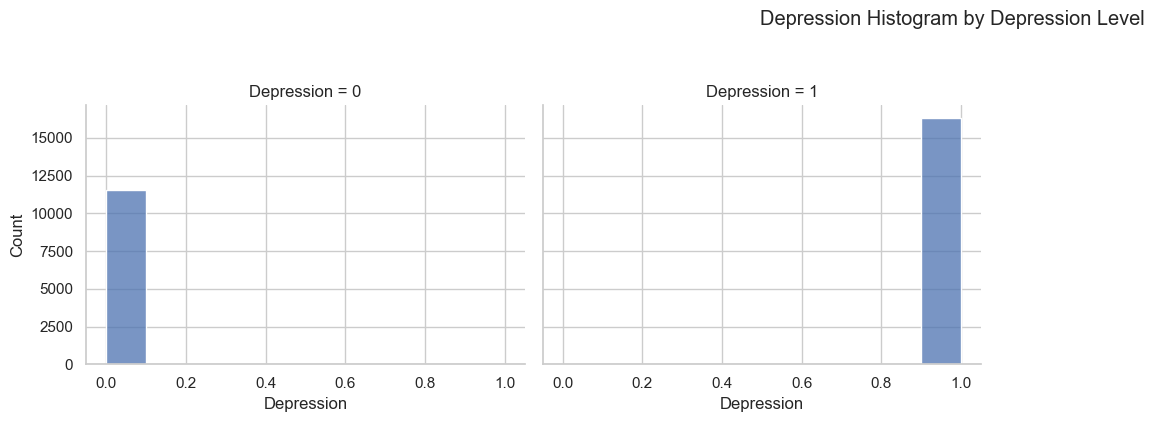

In [105]:

depression_levels = df['Depression'].unique()

for feature in numerical_col:
    g = sns.displot(data=df, x=feature, col='Depression', col_wrap=4, bins=10, kde=False, height=4, aspect=1.2)
    g.fig.suptitle(f'{feature} Histogram by Depression Level', y=1.05)
    plt.tight_layout()
    plt.show()


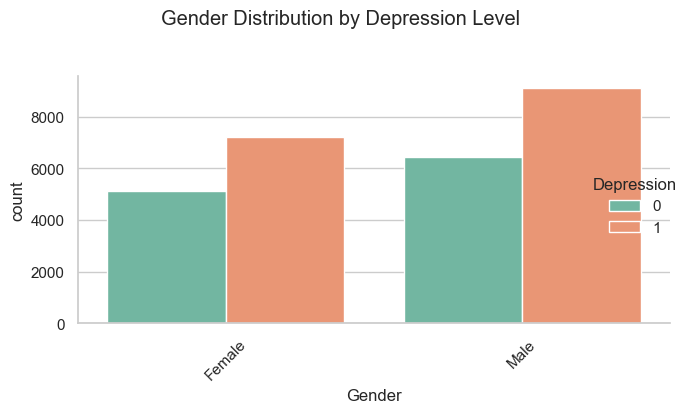

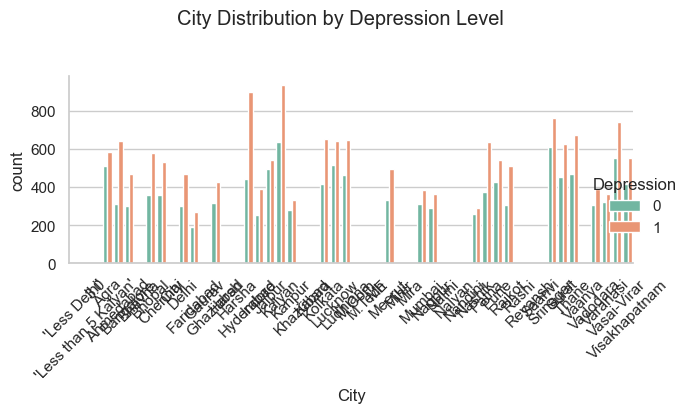

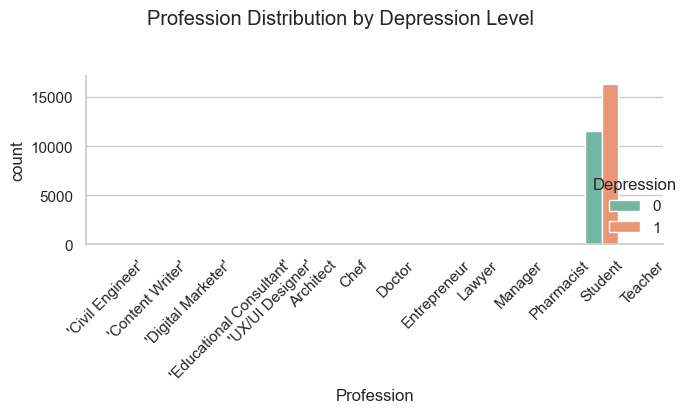

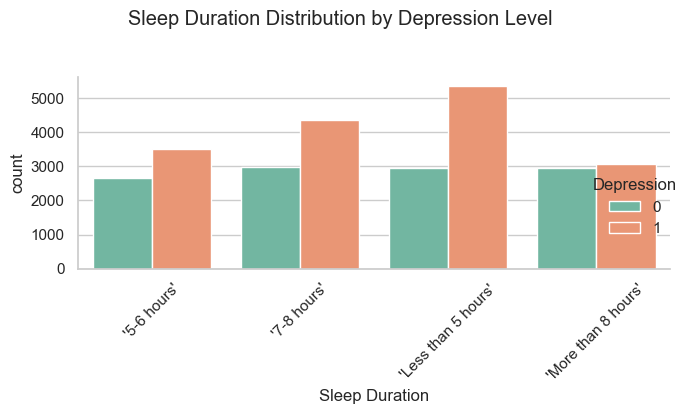

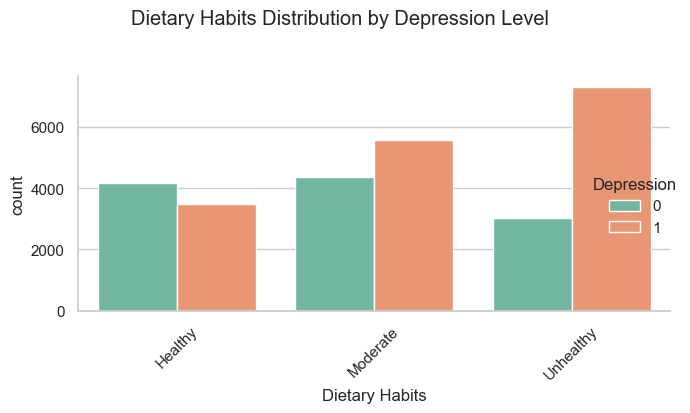

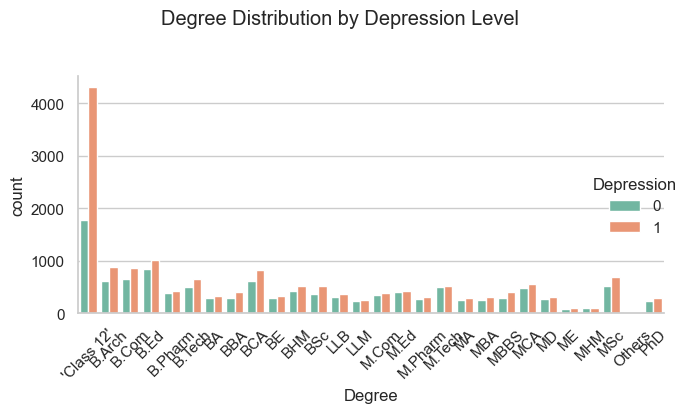

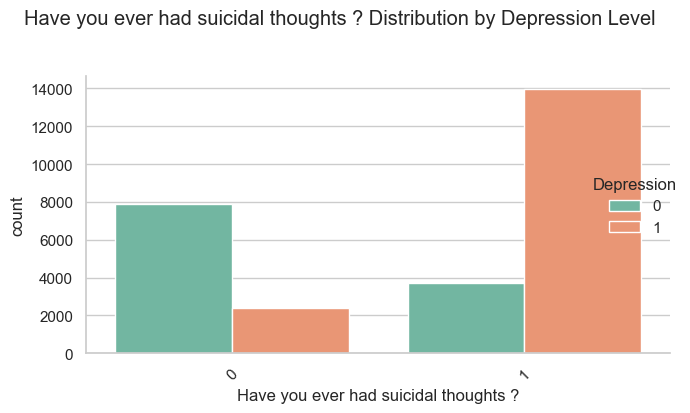

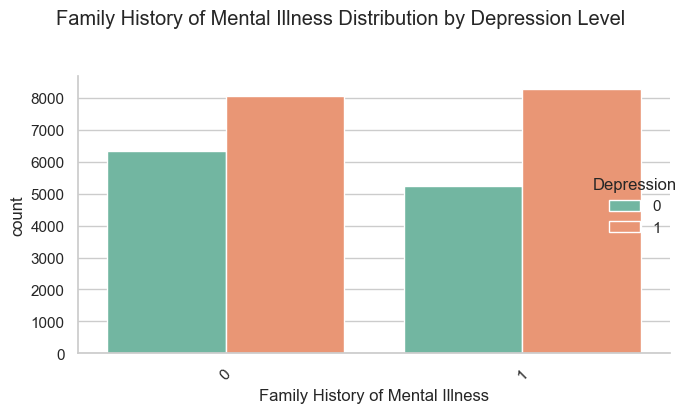

In [118]:


for feature in categorical_col:
    try:
        g = sns.catplot(data=df, x=feature, kind='count', hue='Depression',
                        height=4, aspect=1.5, palette='Set2')
        g.fig.suptitle(f'{feature} Distribution by Depression Level', y=1.03)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not plot {feature}: {e}")
